## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

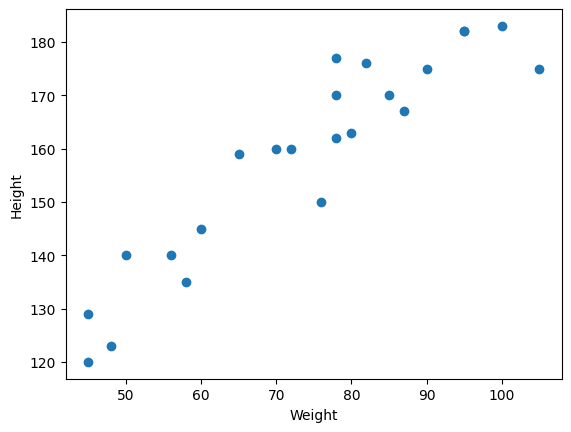

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
X = df[['Weight']]
y = df[['Height']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Height')

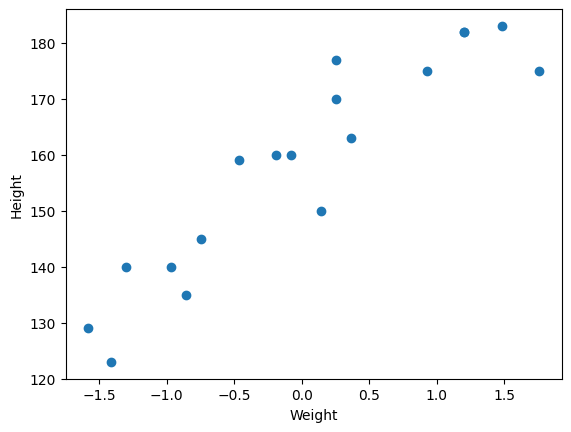

In [12]:
plt.scatter(X_train,y_train)
plt.xlabel('Weight')
plt.ylabel('Height')

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [14]:
print("slope:",reg.coef_)
print("intercept:",reg.intercept_)

slope: [[17.41964561]]
intercept: [158.22222222]


Text(0, 0.5, 'Height')

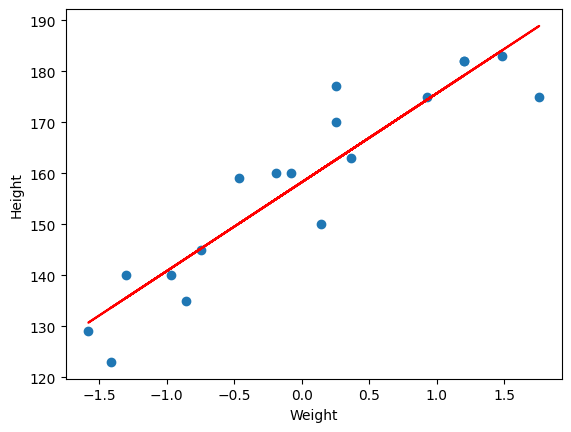

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train),'r')
plt.xlabel('Weight')
plt.ylabel('Height')

Text(0, 0.5, 'Height')

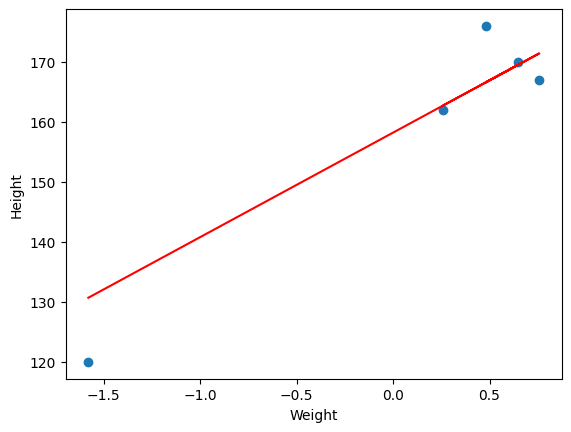

In [49]:
y_pred = reg.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,reg.predict(X_test),'r')
plt.xlabel('Weight')
plt.ylabel('Height')

### Performance Metrics
##### >MSE,MAE,RMSE
##### >R sqared and adjusted R squared

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

44.72264060948182
5.151641248745039
6.687498830615361


In [53]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
adj_score = 1-((1-score)*(len(y)-1)/(len(y)-len(y_pred)-1))

print(score)
print(adj_score)

0.8884165653456042
0.8555979080943114


In [61]:
sc_wt=sc.transform([[80]])
print('Height for 80 kg weight is',reg.predict([sc_wt[0]]))

Height for 80 kg weight is [[164.63212698]]


c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


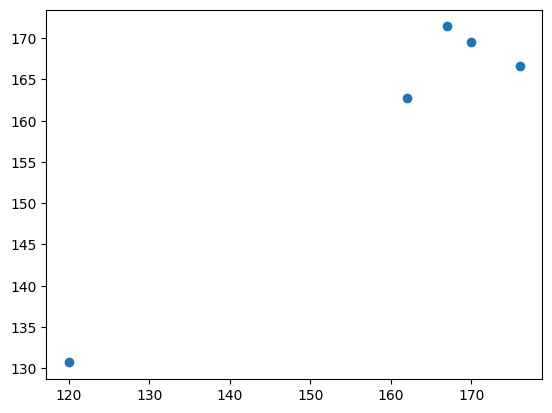

In [62]:
plt.scatter(y_test,y_pred)

In [63]:
res = y_test-y_pred
res

,Height
0,-10.697337
14,0.520046
10,9.428742
19,-4.419085
5,-0.692996


C:\Users\Vivek\AppData\Local\Temp\ipykernel_20776\2861701048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,kde=2)


<Axes: ylabel='Density'>

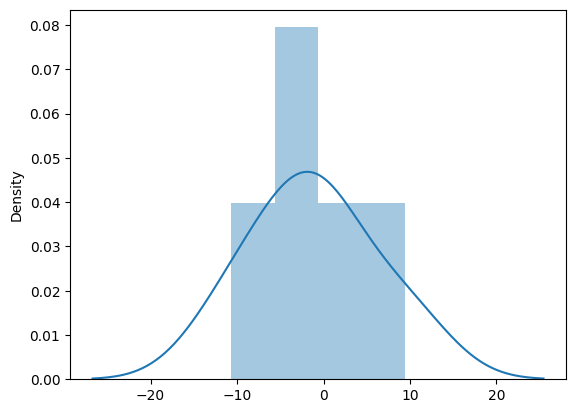

In [65]:
import seaborn as sns
sns.distplot(res,kde=2)

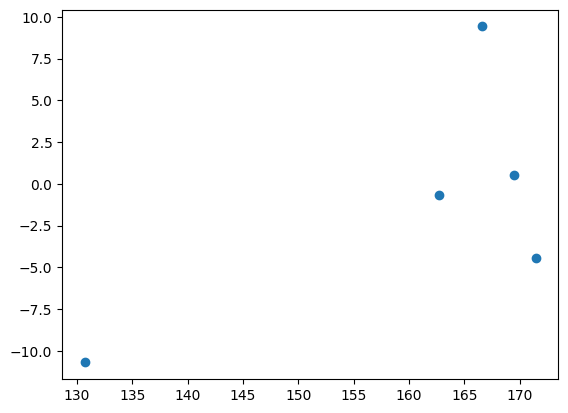

In [66]:
plt.scatter(y_pred,res)